In [71]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from scipy.stats import norm
import seaborn as sns

In [3]:
wh_df = pd.read_csv('/Users/ashutoshfolane/Documents/VIBHUTI/Git_Repos/Datasets/weight-height.csv')

In [4]:
wh_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
wh_df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

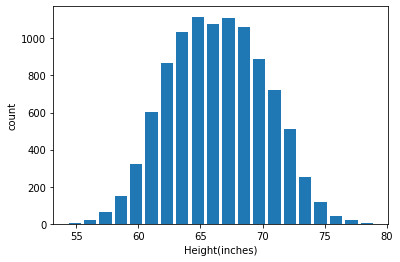

In [11]:
plt.hist(wh_df.Height, bins = 20, rwidth=0.8)
plt.xlabel('Height(inches)')
plt.ylabel('count')
plt.show()

- For 65inch height, there are more thna 1000 samples

In [12]:
wh_df.Height.min()

54.2631333250971

In [13]:
wh_df.Height.max()

78.99874234638959

In [14]:
wh_df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

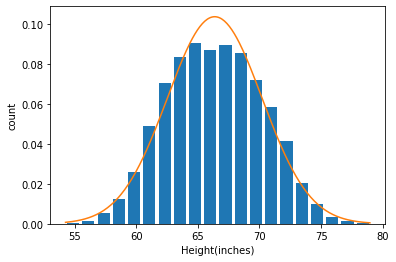

In [18]:
plt.hist(wh_df.Height, bins = 20, rwidth=0.8, density=True)
plt.xlabel('Height(inches)')
plt.ylabel('count')

rng = np.arange(wh_df.Height.min(),wh_df.Height.max(),0.1)
plt.plot(rng, norm.pdf(rng,wh_df.Height.mean(),wh_df.Height.std()))
plt.show()

# Using standard deviation for outlier detection

https://www.youtube.com/watch?v=KFuEAGR3HS4

In [19]:
wh_df.Height.mean()

66.36755975482106

In [20]:
wh_df.Height.std()

3.847528120773233

Now lets use 3-std o remove outliers:

In [22]:
upper_limit = wh_df.Height.mean()+ 3*wh_df.Height.std()
upper_limit

77.91014411714076

In [23]:
lower_limit = wh_df.Height.mean()- 3*wh_df.Height.std()
lower_limit

54.82497539250136

Now lets see outliers in our df

In [27]:
wh_df[(wh_df['Height']>upper_limit)|(wh_df['Height']<lower_limit)]
# wh_df[(wh_df.Height > upper_limit)|(wh_df.Height < lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


for this removal of this outlier, we can discuss with the business manager who is building out the model.If he agrees, we can remove this as outlier.

In [30]:
df_after_removal = wh_df[(wh_df.Height<upper_limit)& (wh_df.Height>lower_limit)]
df_after_removal.shape

(9993, 3)

In [31]:
wh_df.shape[0] - df_after_removal.shape[0]

7

# Using z-score for outlier detection

Z-score: gives you a number which tell us how many standard deviations are you away from mean

In [34]:
new_df = wh_df
new_df.drop('Weight', axis =1, inplace=True)
new_df.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [35]:
new_df['Z-score'] = (new_df.Height - new_df.Height.mean())/new_df.Height.std()
new_df.head()

,Gender,Height,Z-score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [39]:
new_df[(new_df['Z-score']>3) | (new_df['Z-score']<-3)]

,Gender,Height,Z-score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [37]:
new_df[new_df['Z-score']<-3]

,Gender,Height,Z-score
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [40]:
no_outlier = new_df[(new_df['Z-score']<3) | (new_df['Z-score']>-3)]
no_outlier.head()

,Gender,Height,Z-score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


# Outlier Detection using IQR

Taking scale = 1.5:<br>
When scale is taken as 1.5, then according to IQR Method any data which lies beyond 2.7σ from the mean (μ), on either side, shall be considered as outlier. And this decision range is the closest to what Gaussian Distribution tells us, i.e., 3σ.

In [50]:
height_df = pd.read_csv('/Users/ashutoshfolane/Documents/VIBHUTI/Git_Repos/Datasets/Height.txt')
height_df

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dimity,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6


In [51]:
height_df.columns

Index(['name', 'height'], dtype='object')

In [60]:
stats = height_df['height'].describe()
IQR = stats['75%'] - stats['25%']
IQR

0.9249999999999998

In [59]:
upper_bound = stats['75%'] + 1.5 * IQR
lower_bound = stats['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper_bound, lower_bound))

The upper and lower bounds for suspected outliers are 7.6625 and 3.962500000000001.


In [67]:
# plt.hist(height_df.height, bins =20, density =1 )
# plt.xlabel('Height')
# plt.ylabel('count')

# rng = np.arange(height_df.height.min(),height_df.height.max(),0.1)
# plt.plot(rng, norm.pdf(height_df.height.mean(),height_df.height.std()))
# plt.show()


# rng = np.arange(wh_df.Height.min(),wh_df.Height.max(),0.1)
# plt.plot(rng, norm.pdf(rng,wh_df.Height.mean(),wh_df.Height.std()))
# plt.show()

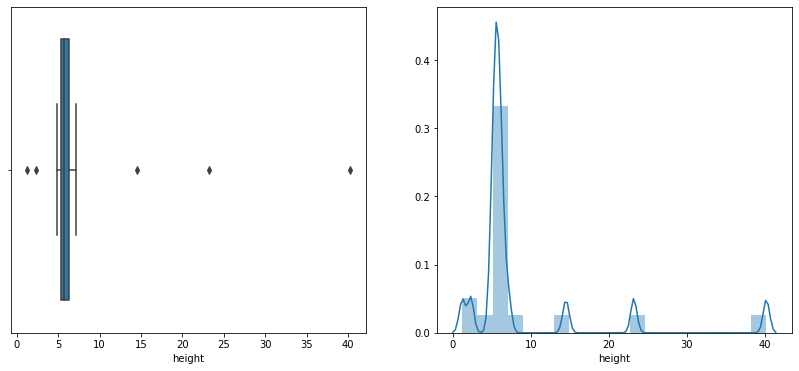

In [70]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(height_df['height'])
plt.subplot(1,2,2)
sns.distplot(height_df['height'], bins = 20)
plt.show()

# Housing_data_analysis:

In [73]:
house_df = pd.read_csv("/Users/ashutoshfolane/Documents/VIBHUTI/Git_Repos/Datasets/bhp.csv")
house_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [74]:
house_df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

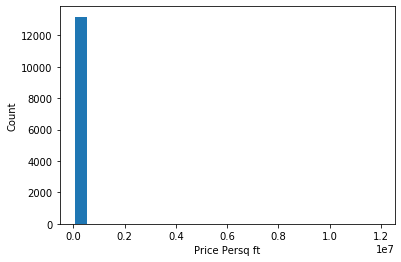

In [75]:
plt.hist(house_df.price_per_sqft, bins = 20, rwidth = 0.8)
plt.xlabel('Price Persq ft')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar



## Using log scale can make visualization little better

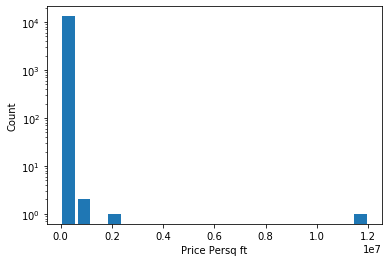

In [76]:
plt.hist(house_df.price_per_sqft, bins = 20, rwidth = 0.8)
plt.xlabel('Price Persq ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

Treat Qutlier with IQR method:

In [77]:
stats = house_df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [79]:
IQR = stats['75%']-stats['25%']
IQR

0.9249999999999998

In [81]:
Upper_bound = stats['75%'] + 1.5*IQR
Lower_bound = stats['25%'] - 1.5*IQR

print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper_bound, lower_bound))

The upper and lower bounds for suspected outliers are 7.6625 and 3.962500000000001.


In [84]:
outliers = house_df[(house_df.price_per_sqft > Upper_bound)|(house_df.price_per_sqft < Lower_bound)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
12776,other,1 BHK,450.0,1.0,20.00,1,4444
2306,other,5 Bedroom,1575.0,4.0,150.00,5,9523
9656,Electronic City Phase II,2 BHK,1200.0,2.0,34.65,2,2887
3434,Pattandur Agrahara,2 BHK,875.0,2.0,33.00,2,3771
2893,other,7 Bedroom,1600.0,7.0,104.00,7,6500
9791,other,4 Bedroom,1200.0,5.0,325.00,4,27083
4411,Hennur Road,2 BHK,1232.0,2.0,69.61,2,5650
10736,Kothanur,2 BHK,1075.0,2.0,53.00,2,4930
1262,Whitefield,2 BHK,1190.0,2.0,57.00,2,4789
5671,Sarjapur Road,3 BHK,2180.0,3.0,240.00,3,11009


## (2) Now remove outliers using 4 standard deviation

In [94]:
h_df = pd.read_csv("/Users/ashutoshfolane/Documents/VIBHUTI/Git_Repos/Datasets/bhp.csv")
h_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [95]:
max_limit = h_df.price_per_sqft.mean() + 4*h_df.price_per_sqft.std()
min_limit = h_df.price_per_sqft.mean() - 4*h_df.price_per_sqft.std()
max_limit, min_limit

(434828.97805485805, -418988.3045700096)

In [96]:
h_df[(h_df.price_per_sqft > max_limit) | (h_df.price_per_sqft < min_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


In [97]:
removed_outlier = h_df[(h_df.price_per_sqft>min_limit) & (h_df.price_per_sqft<max_limit)]
removed_outlier.shape

(13196, 7)

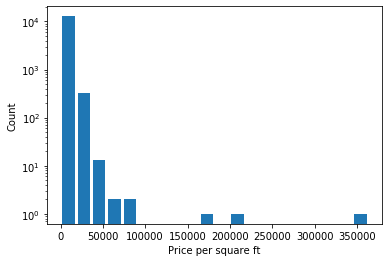

In [99]:
plt.hist(removed_outlier.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

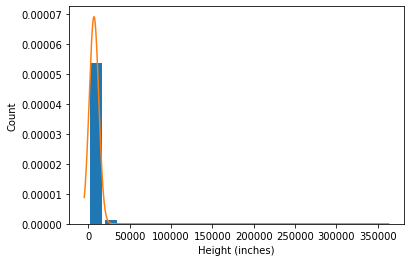

In [103]:
from scipy.stats import norm
import numpy as np

plt.hist(removed_outlier.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, removed_outlier.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,removed_outlier.price_per_sqft.mean(),removed_outlier.price_per_sqft.std()))
plt.show()

# Isolation Forest:

In [104]:
from sklearn.ensemble import IsolationForest

In [105]:
import numpy as np
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20
random_data

array([[ 52.48690727,   7.76487173],
       [  9.43656495,  -1.45937244],
       [ 37.30815259, -26.03077394],
       ...,
       [ 45.12216872,  24.06792877],
       [ 40.53880988,  21.62450623],
       [ 26.88092355,   5.04887507]])

In [106]:
clf = IsolationForest( behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(random_data)
preds

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


array([-1,  1, -1, ...,  1,  1,  1])

# This code will output the predictions for each data point in an array. If the result is -1, it means that this specific data point is an outlier. If the result is 1, then it means that the data point is not an outlier